<a href="https://colab.research.google.com/github/318245915/Reconocimiento-de-Patrones-y-Aprendizaje-Automatizado/blob/main/Pr%C3%A1ctica_7_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 7. Clustering
1. Usando K-means y el archivo wine.csv realiza los siguientes ejercicios:
*   Para k = 1, ..., 10. Calcula el WCSS para cada k y graficalos.
*   Justifica qué valor de k sería el más óptimo.
*   Obtén las diferentes clases de vinos.

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

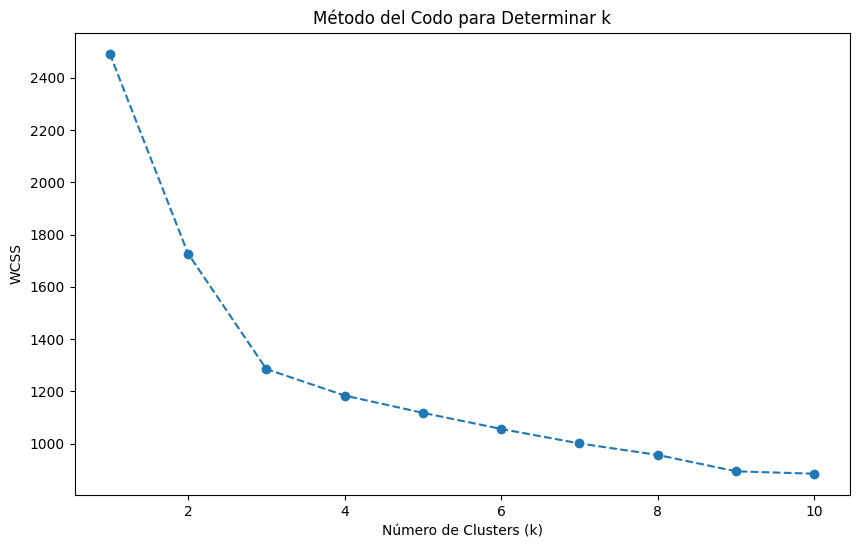

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar el archivo wine.csv
data = pd.read_csv('wine.csv')

# Explorar los datos
print(data.head())

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Calcular WCSS para diferentes valores de k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Graficar los valores de WCSS para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para Determinar k')
plt.show()


In [7]:
# Ajustar el modelo K-means con el valor de k óptimo
kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
kmeans.fit(data_scaled)

# Obtener las etiquetas de cluster asignadas a cada muestra
labels = kmeans.labels_
data['Cluster'] = labels

# Obtener las diferentes clases de vinos
wine_classes = data['Cluster'].unique()
print("Diferentes clases de vinos:", wine_classes)


Diferentes clases de vinos: [1 7 8 4 3 2 5 6 9 0]


2. Usando el archivo clusters.csv realiza lo siguiente:
* Utiliza Hierarchical clustering, K-Means, DBSCAN y GaussianMixture para obtener los diferentes clusters.
*   Utiliza al menos tres formas de evaluar los resultados de los algoritmos utilizados.
* Prueba diferentes hiperparámetros en cada uno de los modelos y reporta aquellos que produzcan los mejores resutados.
* ¿Cuál es el número óptimo de clusters para este conjunto de datos? Justifica tu respuesta.
* Compara los resultados entre los diferentes algoritmos. ¿Cuál es el mejor algoritmo para clasificar este conjunto de datos?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Cargar el archivo clusters.csv
data = pd.read_csv('clusters.csv')

# Explorar los datos
print(data.head())
print(data.shape)

          x         y
0  0.816729  1.327191
1  0.286716  1.304853
2  2.087953  0.025302
3  0.418027  1.034951
4  1.230035 -0.127041
(3250, 2)


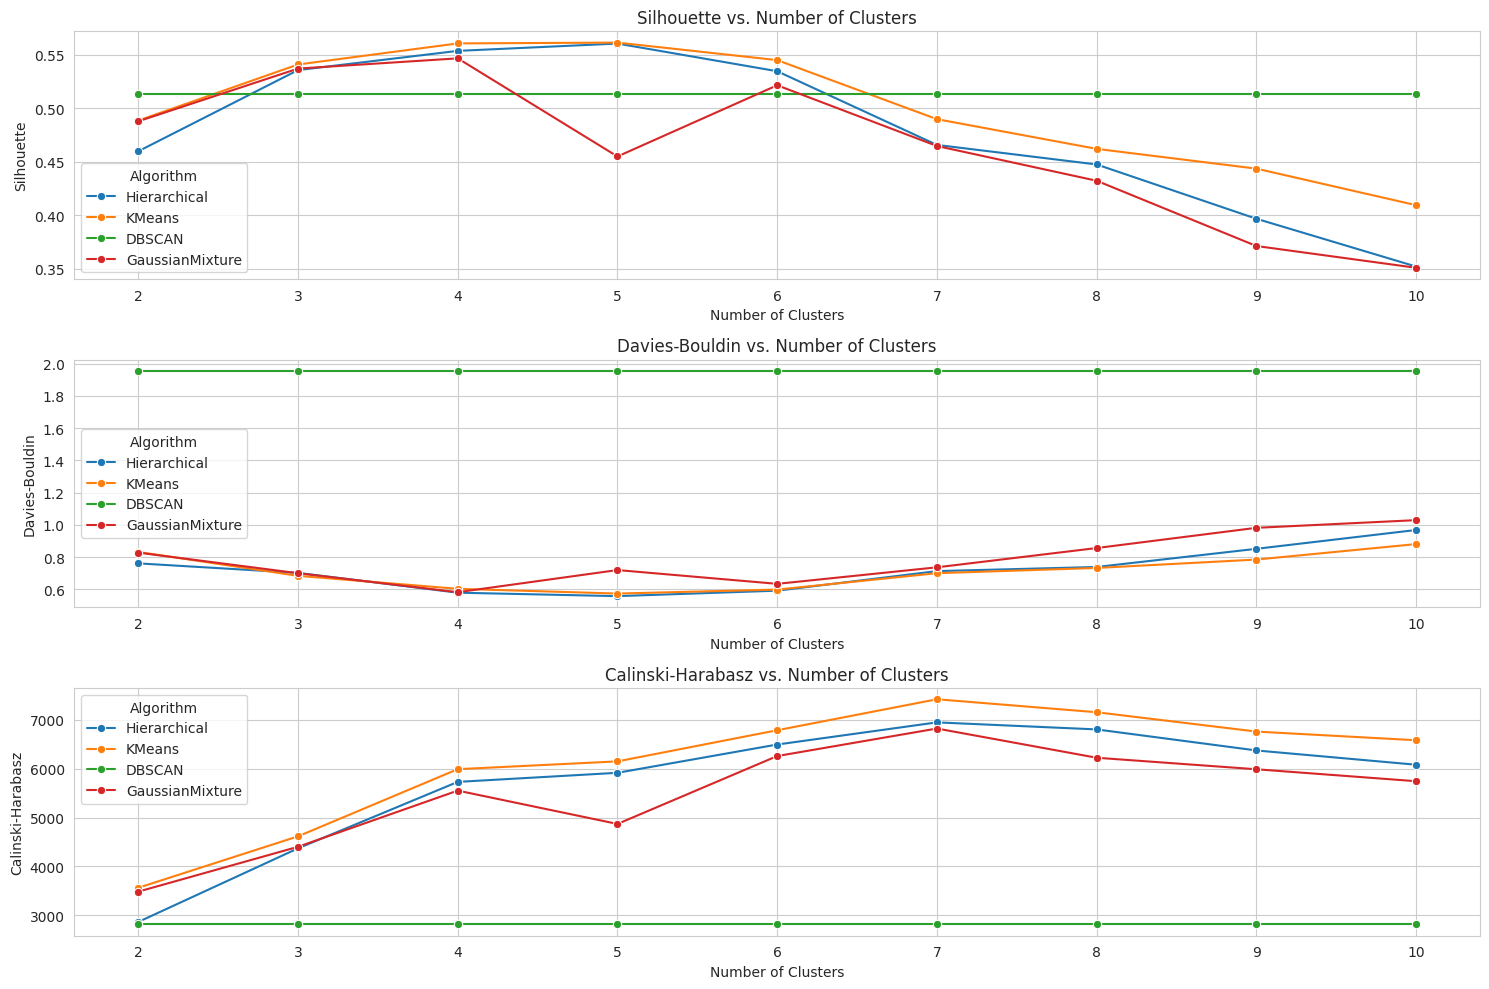

In [10]:
# Definir el número de clusters a buscar
k_values = range(2, 11)
results = []

# Aplicar los algoritmos y evaluarlos
for k in k_values:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    kmeans = KMeans(n_clusters=k, n_init=10)
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    gmm = GaussianMixture(n_components=k)

    algorithms = [('Hierarchical', hierarchical), ('KMeans', kmeans), ('DBSCAN', dbscan), ('GaussianMixture', gmm)]

    for name, algorithm in algorithms:
        labels = algorithm.fit_predict(data)
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
        results.append({'Algorithm': name, 'K': k, 'Silhouette': silhouette, 'Davies-Bouldin': davies_bouldin, 'Calinski-Harabasz': calinski_harabasz})

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)

# Visualizar los resultados
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

metrics = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
for i, metric in enumerate(metrics, start=1):
    plt.subplot(3, 1, i)
    sns.lineplot(x='K', y=metric, hue='Algorithm', data=results_df, marker='o')
    plt.title(f'{metric} vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

Para determinar el número óptimo de clusters y comparar los resultados entre diferentes algoritmos:

1. **Número óptimo de clusters**: Observa las gráficas de las métricas (Silhouette, Davies-Bouldin, Calinski-Harabasz) en función del número de clusters. Busca un punto donde todas las métricas indiquen un mejor rendimiento, en el 7.

2. **Comparación entre algoritmos**: podría ser Davies-Bouldin.

3. **Justificación**: los clusters son cohesivos y bien separados, lo que los hace óptimos para tu conjunto de datos.